In [36]:
import pandas as pd
from sklearn import metrics, model_selection, ensemble
import matplotlib.pyplot as plt


df = pd.read_csv('suumo_treated.csv', sep = '\t', encoding='utf-16', index_col=0)

df = df.sort_values(by='賃料月額', ascending=False)
df = df.drop(29926)
df.head()

,マンション名,区,間取り,間取りDK_LDK,間取りK,間取りS,築年数,建物高さ,階,専有面積,...,駅,賃料,管理費,敷金,礼金,保証金,"敷引,償却",賃料月額,初期費用,年間費用
12831,六本木ヒルズレジデンス C棟,港,5,1,0,0,15,45,38,296.62,...,六本木駅,3250000,0,13000000,0,0,0,3250000,13000000,52000000
12830,六本木ヒルズレジデンス C棟,港,4,1,0,0,15,45,24,238.71,...,六本木駅,2690000,0,10760000,0,0,0,2690000,10760000,43040000
12834,都営大江戸線 六本木駅 地下2地上43階建 築15年,港,4,1,0,0,15,45,24,238.71,...,六本木駅,2690000,0,10760000,0,0,0,2690000,10760000,43040000
12925,東京メトロ日比谷線 六本木駅 地下1地上9階建 築12年,港,4,1,0,0,12,10,8,301.53,...,六本木駅,2600000,0,15600000,0,0,0,2600000,15600000,46800000
12924,麻布第一マンションズ,港,4,1,0,0,12,10,8,301.53,...,六本木駅,2600000,0,15600000,0,0,0,2600000,15600000,46800000


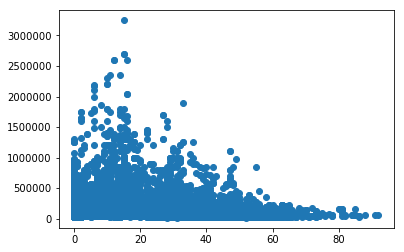

In [37]:

#df.to_csv('suumo_treated.csv', sep = '\t',encoding='utf-16')
df = df.drop(df.index[df['築年数'] == 99])

plt.scatter(df['築年数'], df['賃料月額'])
plt.show()

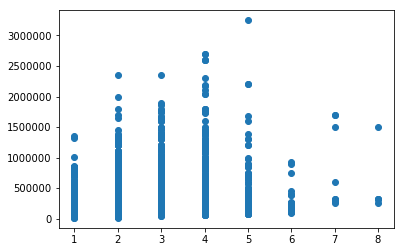

In [38]:
plt.scatter(df['間取り'], df['賃料月額'])
plt.show()

In [39]:
df.sort_values(by='間取り', ascending=False).head(5)

,マンション名,区,間取り,間取りDK_LDK,間取りK,間取りS,築年数,建物高さ,階,専有面積,...,駅,賃料,管理費,敷金,礼金,保証金,"敷引,償却",賃料月額,初期費用,年間費用
103224,等々力一丁目 一時貸し戸建て,世田谷,8,1,0,1,44,2,1,264.00,...,尾山台駅,250000,0,500000,250000,0,0,250000,750000,3750000
34629,代官山戸建,渋谷,8,1,0,0,8,3,1,317.88,...,代官山駅,1500000,0,4500000,0,0,0,1500000,4500000,22500000
82565,中央３丁目戸建,大田,8,1,0,1,35,4,2,209.28,...,池上駅,320000,0,320000,320000,0,0,320000,640000,4480000
82564,大田区中央３丁目ビル,大田,8,1,0,0,35,4,2,209.28,...,大森駅 バス8分 (バス停)入新井第四小学校,320000,0,320000,320000,0,0,320000,640000,4480000
82562,東急池上線 池上駅 地下1地上3階建 築35年,大田,8,1,0,1,35,4,2,214.39,...,池上駅,320000,0,320000,320000,0,0,320000,640000,4480000


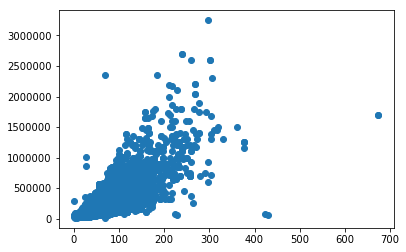

In [40]:
plt.scatter(df['専有面積'], df['賃料月額'])
plt.show()

In [41]:
df.sort_values(by='専有面積', ascending=False).head(5)

,マンション名,区,間取り,間取りDK_LDK,間取りK,間取りS,築年数,建物高さ,階,専有面積,...,駅,賃料,管理費,敷金,礼金,保証金,"敷引,償却",賃料月額,初期費用,年間費用
69266,下目黒五丁目戸建,目黒,7,1,0,1,27,4,1,674.13,...,武蔵小山駅,1700000,0,6800000,1700000,0,0,1700000,8500000,28900000
69267,下目黒五丁目戸建,目黒,7,1,0,1,27,4,1,674.13,...,武蔵小山駅,1700000,0,6800000,1700000,0,0,1700000,8500000,28900000
199848,グリーンシャルム,江戸川,2,1,0,0,32,3,2,429.00,...,葛西駅,60000,0,60000,0,0,60000,60000,120000,840000
76041,京急空港線 大鳥居駅 3階建 築32年,大田,2,1,0,0,32,3,3,423.71,...,大鳥居駅,80000,2000,80000,80000,0,0,82000,160000,1144000
34595,東京メトロ日比谷線 広尾駅 地下1地上3階建 築18年,渋谷,4,1,0,0,18,4,1,376.56,...,広尾駅,1250000,0,5000000,0,0,0,1250000,5000000,20000000


In [42]:
df = df.drop([69267, 69266, 199848, 76041])

In [43]:
df = df.dropna()
# test = df.sort_values(by='間取り', ascending=True)
# test.head()

In [44]:
#ward = pd.get_dummies(df['区'])

df = df[df['駅'].str.contains('.*駅')]
station = pd.get_dummies(df['駅'])

df = pd.merge(df, station, left_index=True, right_index=True)

In [45]:
df_extract = df
label = df_extract['賃料月額']
df_extract.drop(['マンション名','区','路線', '駅', '賃料','管理費','敷金','礼金','保証金','敷引,償却', '賃料月額', '初期費用', '年間費用'], axis=1, inplace=True) 
data = df_extract

data_train, data_test, label_train, label_test = \
    model_selection.train_test_split(data, label, test_size=0.2)

data_train.head()

,間取り,間取りDK_LDK,間取りK,間取りS,築年数,建物高さ,階,専有面積,歩分,お台場海浜公園駅,...,高田馬場駅,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,麹町駅,麻布十番駅
109390,1,0,1,0,7,5,1,20.65,2.0,0,...,0,0,0,0,0,0,0,0,0,0
158722,1,1,0,0,2,3,1,41.67,13.0,0,...,0,0,0,0,0,0,0,0,0,0
139647,2,1,0,0,28,4,4,41.80,6.0,0,...,0,0,0,0,0,0,0,0,0,0
143747,1,1,0,0,22,8,7,44.45,1.0,0,...,0,0,0,0,0,0,0,0,0,0
82284,3,1,0,0,13,8,5,73.51,12.0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#params = [{"n_estimators": [10, 100, 300]}]

#clf = GridSearchCV(ensemble.RandomForestRegressor(), params)
clf = ensemble.RandomForestRegressor(n_estimators=100)

clf.fit(data_train, label_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [47]:
clf.score(data_train, label_train)

0.98976701841057457

In [48]:
clf.score(data_test, label_test)

0.91581148324512884

In [49]:
from sklearn.externals import joblib

joblib.dump(clf, 'suumo_rent_monthly_rent_station.pkl')

['suumo_rent_monthly_rent_station.pkl']

In [50]:

test_reindex = pd.merge(data_test, label_test.to_frame(), left_index=True, right_index=True)
test_reindex = test_reindex.sort_values(by='賃料月額').reset_index()

del test_reindex['index']

test_reindex.head()

,間取り,間取りDK_LDK,間取りK,間取りS,築年数,建物高さ,階,専有面積,歩分,お台場海浜公園駅,...,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,麹町駅,麻布十番駅,賃料月額
0,1,0,0,0,31,3,2,2.30,8.0,0,...,0,0,0,0,0,0,0,0,0,10000
1,1,0,0,0,46,2,2,10.40,8.0,0,...,0,0,0,0,0,0,0,0,0,20000
2,1,0,1,0,42,2,2,13.93,7.0,0,...,0,0,0,0,0,0,0,0,0,20000
3,1,0,0,0,41,4,2,10.00,8.0,0,...,0,0,0,0,0,0,0,0,0,20000
4,1,0,0,0,47,2,2,10.00,15.0,0,...,0,0,0,0,0,0,0,0,0,20000


In [51]:
plt.plot(test_reindex.index, test_reindex['賃料月額'])
Y  = test_reindex['賃料月額']
del test_reindex['賃料月額']
X = test_reindex

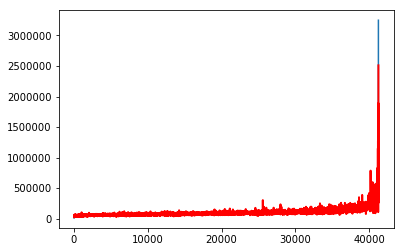

In [52]:
plt.plot(X.index, clf.predict(X), color='red', linewidth=2)
plt.show()

In [53]:
residual_RF = (Y-clf.predict(X))**2
residual_RF_total = residual_RF.sum()
#print(mean_absolute_error(Y, clf.predict(X)))
print(residual_RF_total)

18091563806114.773


In [54]:
from sklearn import linear_model

clf_LR = linear_model.LinearRegression(normalize=True)
clf_LR.fit(data_train, label_train)

print(data_train)


        間取り  間取りDK_LDK  間取りK  間取りS  築年数  建物高さ   階    専有面積    歩分  お台場海浜公園駅  \
109390    1          0     1     0    7     5   1   20.65   2.0         0   
158722    1          1     0     0    2     3   1   41.67  13.0         0   
139647    2          1     0     0   28     4   4   41.80   6.0         0   
143747    1          1     0     0   22     8   7   44.45   1.0         0   
82284     3          1     0     0   13     8   5   73.51  12.0         0   
166467    1          0     1     0   14    10   7   27.25   9.0         0   
23228     1          1     0     0   29     2   2   24.00  12.0         0   
4287      1          0     1     0    3    13  10   25.29   4.0         0   
114967    1          1     0     0   28     2   2   21.87  12.0         0   
127431    3          1     0     0   41     4   2   67.85   8.0         0   
195098    2          1     0     0   17     8   6   47.08   4.0         0   
8144      1          0     1     0   10    11   6   25.84  11.0         0   

In [68]:
residual_LR = (Y-clf_LR.predict(X))**2
residual_LR_total = residual_LR.sum()
print(residual_LR_total)

1.5062279482224816e+16


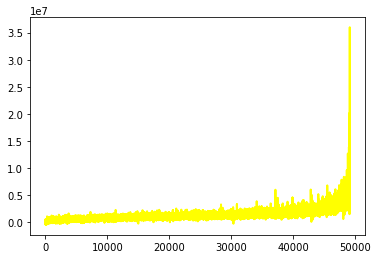

In [69]:
plt.plot(X.index, clf_LR.predict(X), color='yellow', linewidth=2)
plt.show()